In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
names=['sepal-length','sepal-width','petal-length','petal-width','Class']
data=pd.read_csv("C:/Users/sshyu/Downloads/iris.data",names=names)

In [4]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 지도학습- K 최근접이웃

In [6]:
# 훈련과 테스트 데이터셋 분리
X=data.iloc[:,:-1].values
y=data.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.fit_transform(X_test)

In [8]:
# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50) #k=50으로 수행
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [9]:
# 모델 정확도
from sklearn.metrics import accuracy_score
y_pred=knn.predict(X_test)
print('정확도 {}'.format(accuracy_score(y_test,y_pred)))

정확도 0.9666666666666667


In [12]:
# for문을 사용하여 최적의 k값 찾기
k=10
acc_array=np.zeros(k)
for k in np.arange(1,k+1,1):
    classifier=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    acc_array[k-1]=acc
max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print('가장 높은 정확도',max_acc,'에서 최적 k는',k+1)

가장 높은 정확도 0.9666666666666667 에서 최적 k는 1


## 지도학습 - SVM

In [14]:
!pip install tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.2 MB 4.8 MB/s eta 0:01:20
   ---------------------------------------- 1.8/385.2 MB 4.2 MB/s eta 0:01:32
   ---------------------------------------- 2.9/385.2 MB 4.4 MB/s eta 0:01:27
   ---------------------------------------- 3.7/385.2 MB 4.5 MB/s eta 0:01:24
   ---------------------------------------- 4.7/385.2 MB 4.5 MB/s eta 0:01:25
    --------------------------------------- 5.8/385.2 MB 4.6 MB/s eta 0:01:23
    --------------------------------------- 6.8/385.2 MB 4.7 MB/s eta 0:01:22
    --------------------------------------- 8.1/385.2 MB 4.7 MB/s eta 0:01:20
    --------------------------------------- 8.9/385.2 MB 4.7 MB/s eta 0:01:20
   - -------------------------------------- 10.0/385.2 MB 4.7 MB/s eta 0:01:20
   - -------------------------------------- 11.3/385.2 MB 4.8 MB/s eta 0:01:19
   - -------------------------------------- 12.1/385.2 MB 4.8 MB/s et

  You can safely remove it manually.
  You can safely remove it manually.


In [31]:
from sklearn import svm
from sklearn import datasets
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [34]:
iris=datasets.load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.6,random_state=42)

In [39]:
from sklearn.svm import SVC

In [41]:
# 모델 훈련, 모델에 대한 정확도 확인
svm=SVC(kernel='linear',C=1,gamma=0.5)
svm.fit(X_train,y_train)
predictions=svm.predict(X_test)
score=metrics.accuracy_score(y_test,predictions)
print('정확도 :{0:f}'.format(score))

정확도 :0.988889


In [42]:
data=pd.read_csv("C:/Users/sshyu/Downloads/titanic_train.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
data=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
data['Sex']=data['Sex'].map({'male':0,'female':1})
data.dropna(inplace=True)
X=data.drop('Survived',axis=1)
y=data['Survived']

In [44]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250
887,2,0,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000


In [45]:
# 훈련과 테스트 데이터셋으로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [46]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8044692737430168

In [47]:
# confusion matrix를 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test,y_predict),
    columns=['Predicted Not Survival','Predicted Survival'],
    index=['True Not Survivied','True Survived']
)

,Predicted Not Survival,Predicted Survival
True Not Survivied,96,16
True Survived,19,48


In [48]:
%matplotlib inline
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.data.shape) # 이미지가 1787개 있고 8x8이미지의 64차원을 가짐
print(digits.target.shape) # 레이블의 이미지가 1797개 있음

(1797, 64)
(1797,)


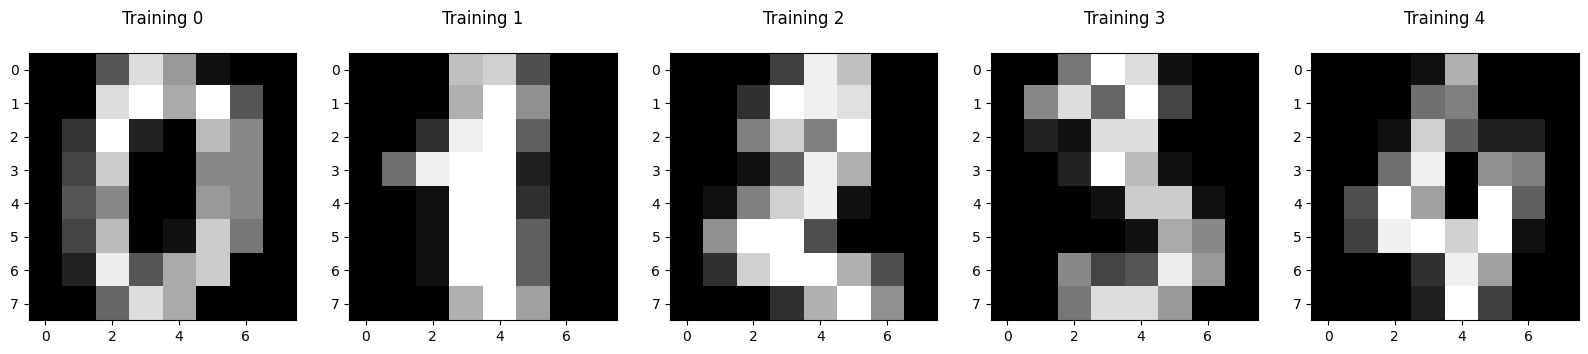

In [50]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training %i\n'%label)

In [55]:
# 모델 훈련
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                               test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [58]:
# 일부 데이터를 사용한 모델 예측
model.predict(X_test[0].reshape(1,-1)) # 새로운 이미지에 대한 예측 결과를 배열로 출력
model.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [60]:
# 전체 데이터를 사용한 모델 예측
predictions=model.predict(X_test)
score=model.score(X_test,y_test)
print(score)

0.9533333333333334


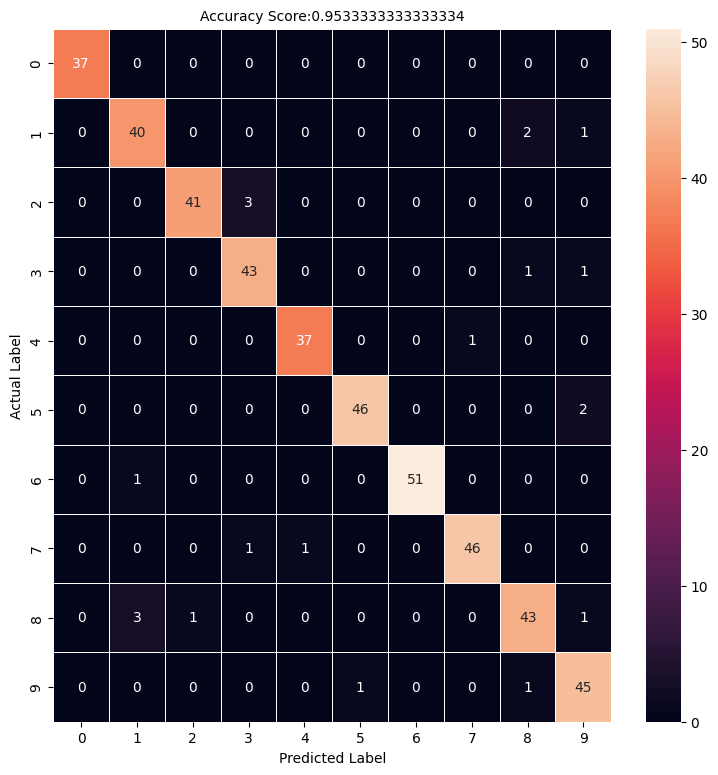

In [63]:
# 혼동 행렬로 시각화
cm=metrics.confusion_matrix(y_test,predictions)
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,linewidth=.5)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=10)
plt.show()

In [64]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
data=pd.read_csv("C:/Users/sshyu/Downloads/weather.csv")

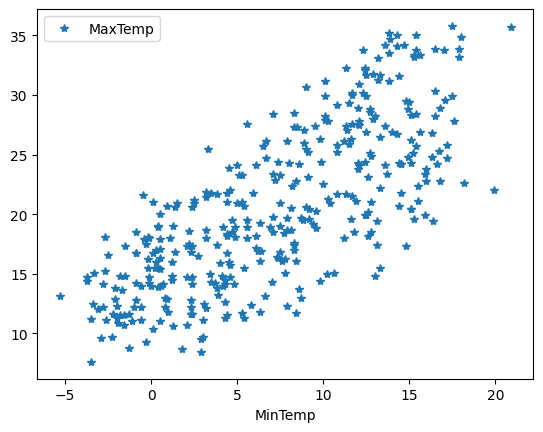

In [67]:
# 데이터간 관계를 시각화로 표현
data.plot(x='MinTemp',y='MaxTemp',style='*')
plt.show()

In [69]:
# 데이터를 독립변수, 종속변수로 나누이
X=data['MinTemp'].values.reshape(-1,1)
y=data['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
# 회귀 모델에 대한 예측
y_pred=model.predict(X_test)
pd.DataFrame({'Acutal':y_test.flatten(),'Predicted':y_pred.flatten()})

,Acutal,Predicted
0,18.9,19.132462
1,26.9,27.512641
2,13.8,12.679725
3,11.0,13.517743
4,20.7,26.507020
...,...,...
69,20.9,15.696589
70,23.1,24.998587
71,24.8,28.099253
72,19.5,18.378246


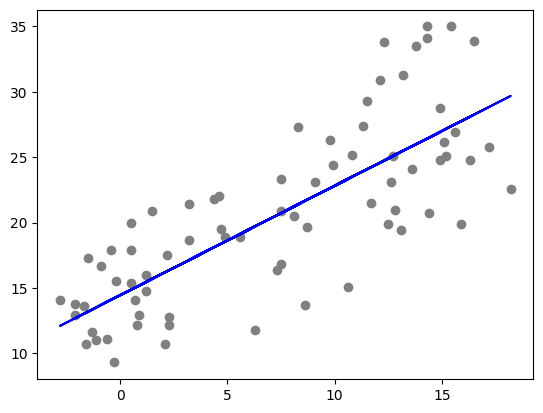

In [71]:
# 테스트 데이터셋을 회귀선으로 표현
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='blue')
plt.show()

In [73]:
# 모델 평가 -> MSE
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

17.88146465492103
4.228648088328116


In [74]:
# k 평균 군집화
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
data=pd.read_csv("C:/Users/sshyu/Downloads/sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


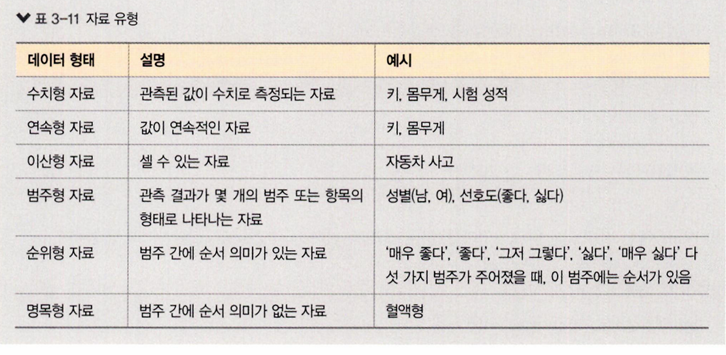

In [75]:
categorical_features=['Channel','Region']
continuous_features=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for col in categorical_features:
    dummies=pd.get_dummies(data[col],prefix=col)
    data=pd.concat([data,dummies],axis=1)
    data.drop(col,axis=1,inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [76]:
# 데이터 전처리 스케일링 적용
mms=MinMaxScaler()
mms.fit(data)
data_transformed=mms.transform(data)

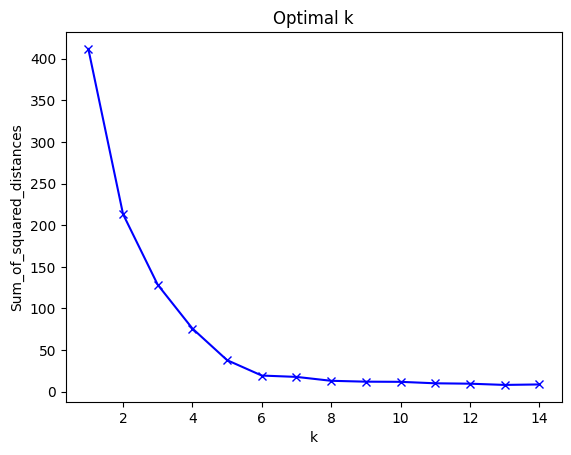

In [77]:
# 적당한 k값 호출
Sum_of_squared_distances = []
K = range(1,15) # 1-14가지 적용
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

In [80]:
# PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
X=pd.read_csv("C:/Users/sshyu/Downloads/credit card.csv")
X=X.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True) #앞의 값으로 결측치가 채워짐
X.head()

C:\Users\sshyu\AppData\Local\Temp\ipykernel_22484\45847867.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill',inplace=True) #앞의 값으로 결측치가 채워짐


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [83]:
# 데이터 전처리 
s=StandardScaler()
X_scaled=s.fit_transform(X)
X_normalized=normalize(X_scaled) # 데이터가 가우스 분포를 따르도록 정규화
X_normalized=pd.DataFrame(X_normalized)
pca=PCA(n_components=2) # 2차원으로 차원축소
X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506


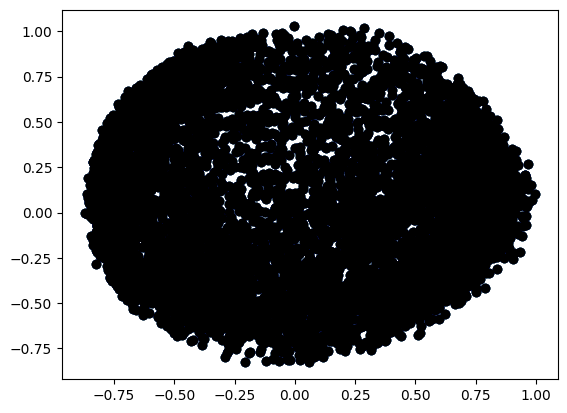

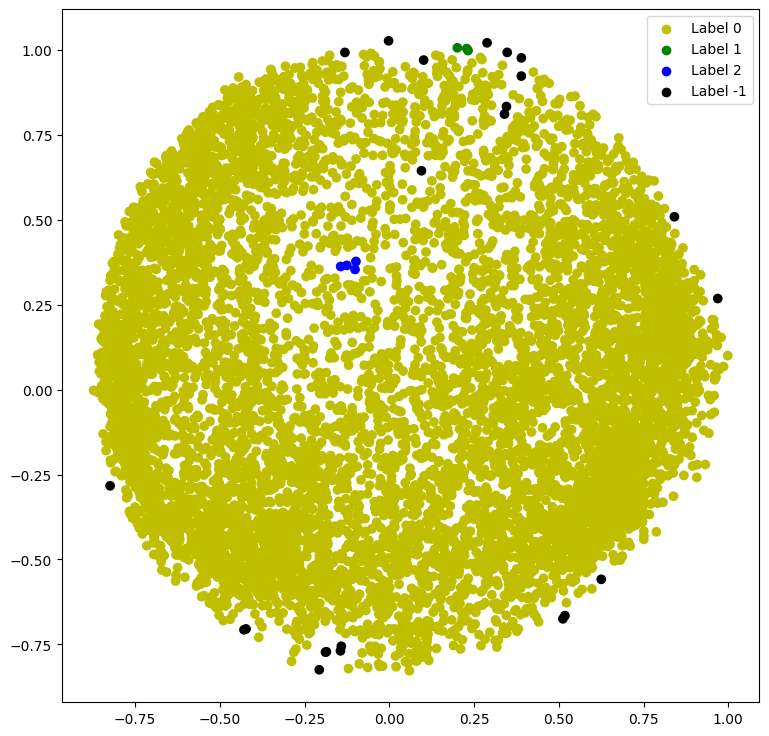

In [84]:
# 시각화
db=DBSCAN(eps=0.0375,min_samples=3).fit(X_principal)
labels=db.labels_
colours={}
colours[0]='y'
colours[1]='g'
colours[2]='b'
colours[-1]='k' # 색상 레이블 설정
cvec=[colours[label] for label in labels]
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

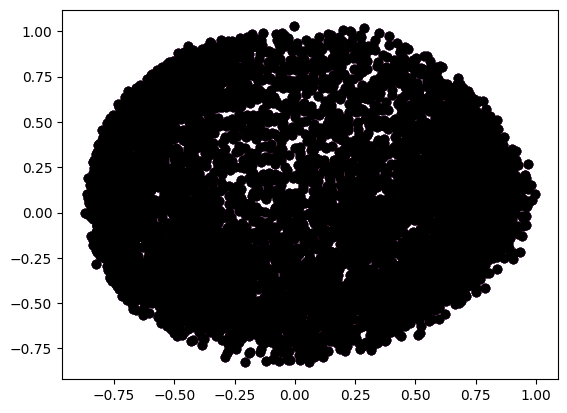

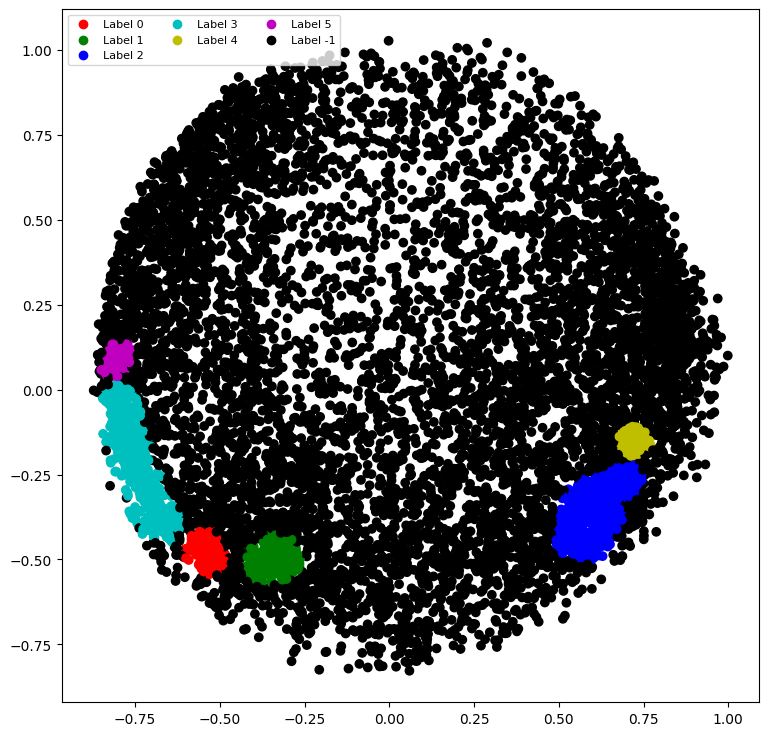

In [85]:
# 클러스터링에 대한 튜닝이 필요함을 알 수 있음
# 하이퍼파라미터 튜닝
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()

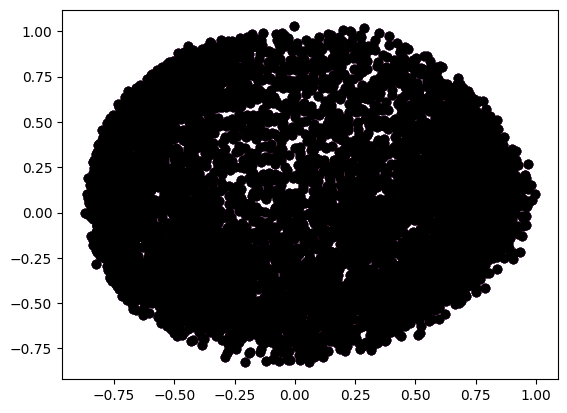

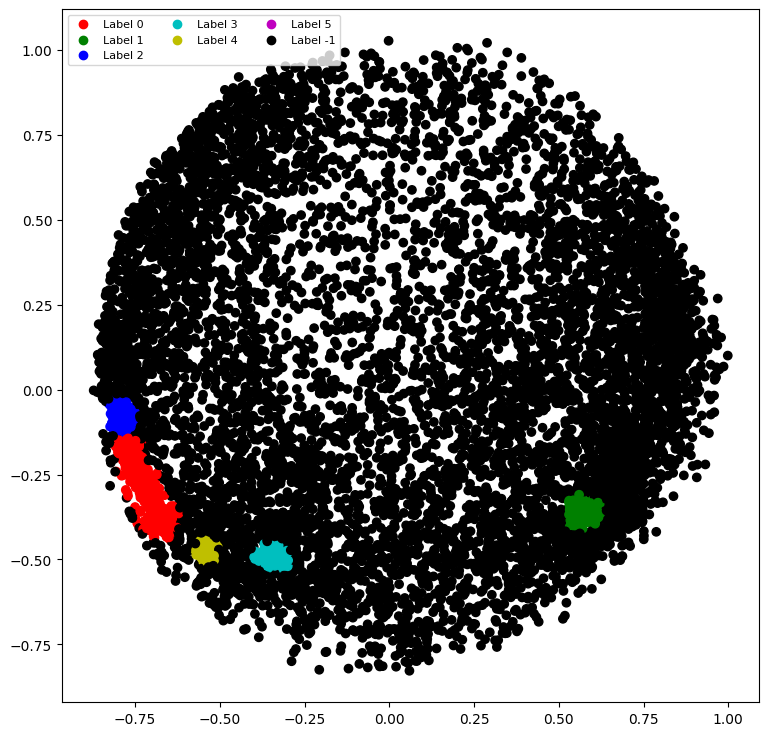

In [86]:
# 70으로 변경해보았을 때
db = DBSCAN(eps = 0.0375, min_samples = 70).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()

In [87]:
# 렐루함수와 소프트맥스 함수를 파이토치에서 구현하는 코드
'''
class Net(torch.nn.Module):
    def __init__(self, n_feature,n_hidden,n_output):
        supper(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden) # 은닉층
        self.relu=torch.nn.ReLu(n_hidden,n_output) # 활성화 함수
        self.out=torch.nn.Linear(n_hidden,n_output) # 출력층
        self.softmax=torch.nn.Softmax(dim=n_output)
    def forward(self,x):
        x=self.hidden(x)
        x=self.relu(x) # 은닉층을 위한 렐루 활성화 함수
        x=self.out(x)
        x=self.softmax(x)
        return x
'''

'\nclass Net(torch.nn.Module):\n    def __init__(self, n_feature,n_hidden,n_output):\n        supper(Net,self).__init__()\n        self.hidden=torch.nn.Linear(n_feature,n_hidden) # 은닉층\n        self.relu=torch.nn.ReLu(n_hidden,n_output) # 활성화 함수\n        self.out=torch.nn.Linear(n_hidden,n_output) # 출력층\n        self.softmax=torch.nn.Softmax(dim=n_output)\n    def forward(self,x):\n        x=self.hidden(x)\n        x=self.relu(x) # 은닉층을 위한 렐루 활성화 함수\n        x=self.out(x)\n        x=self.softmax(x)\n        return x\n'

In [89]:
# 평균제곱 오차를 구하는 함수
'''
loss_fn=torch.nn.MSELoss(reduction='sum')
y_pred=model(x)
loss=loss_fn(y_pred,y)
'''

# 크로스 엔트로피 오차를 구하는 ㅎ마수
'''
loss_fn=torch.nn.CrossEntropyLoss()
input=torch.randn(5,6,requires_grad=True) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용
target=torch.empty(3,dtype=torch.long).random(5) # 랜덤한 값으로 채워진 텐서 변환
output=loss(input,target)
output.backward()
'''

'\nloss_fn=torch.nn.CrossEntropyLoss()\ninput=torch.randn(5,6,requires_grad=True) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용\ntarget=torch.empty(3,dtype=torch.long).random(5) # 랜덤한 값으로 채워진 텐서 변환\noutput=loss(input,target)\noutput.backward()\n'

In [90]:
# 파이토치에서 드롭아웃 구현하는 코드
'''
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)  # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

'''

'\nclass DropoutModel(torch.nn.Module):\n    def __init__(self):\n        super(DropoutModel, self).__init__()\n        self.layer1 = torch.nn.Linear(784, 1200)\n        self.dropout1 = torch.nn.Dropout(0.5)  # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미\n        self.layer2 = torch.nn.Linear(1200, 1200)\n        self.dropout2 = torch.nn.Dropout(0.5)\n        self.layer3 = torch.nn.Linear(1200, 10)\n\n    def forward(self, x):\n        x = F.relu(self.layer1(x))\n        x = self.dropout1(x)\n        x = F.relu(self.layer2(x))\n        x = self.dropout2(x)\n        return self.layer3(x)\n\n'

In [91]:
# 배치경사하강법을 구현하는 코드
'''
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
        self.y_data = [[12], [18], [11]]

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

dataset = CustomDataset()
dataloader = DataLoader(
    dataset,         # 데이터셋
    batch_size=2,    # 미니 배치 크기로 2의 샘플수를 사용하겠다는 의미입니다.
    shuffle=True,    # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옵니다.
)

'''

'\nclass CustomDataset(Dataset):\n    def __init__(self):\n        self.x_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]\n        self.y_data = [[12], [18], [11]]\n\n    def __len__(self):\n        return len(self.x_data)\n\n    def __getitem__(self, idx):\n        x = torch.FloatTensor(self.x_data[idx])\n        y = torch.FloatTensor(self.y_data[idx])\n        return x, y\n\ndataset = CustomDataset()\ndataloader = DataLoader(\n    dataset,         # 데이터셋\n    batch_size=2,    # 미니 배치 크기로 2의 샘플수를 사용하겠다는 의미입니다.\n    shuffle=True,    # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옵니다.\n)\n\n'